In [1]:
%%html
<img width="300" src="logo.png" style="margin-left:auto; margin-right:auto"/>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline 

In [3]:
from faceDetection import FaceDetection
from ageDetection import AgeDetection
from genderDetection import GenderDetection
from faceLandmark import FaceLandmark
from faceRecognition import FaceRecognition
from glassesDetection import GlassesDetection
from emotionDetection import EmotionDetection

Checking license...
License ok


In [4]:
# Init networks - Face Analysis
faceDetection = FaceDetection(0.75, 0.15)
ageDetection = AgeDetection()
genderDetection = GenderDetection()
glassesDetection = GlassesDetection()
faceLandmark = FaceLandmark()
emotionDetection = EmotionDetection()
faceRecognition = FaceRecognition("./database/")

Database is ./database/
./database/angelina.jpg
./database/brixhilda.jpg
./database/FaceID_1.png


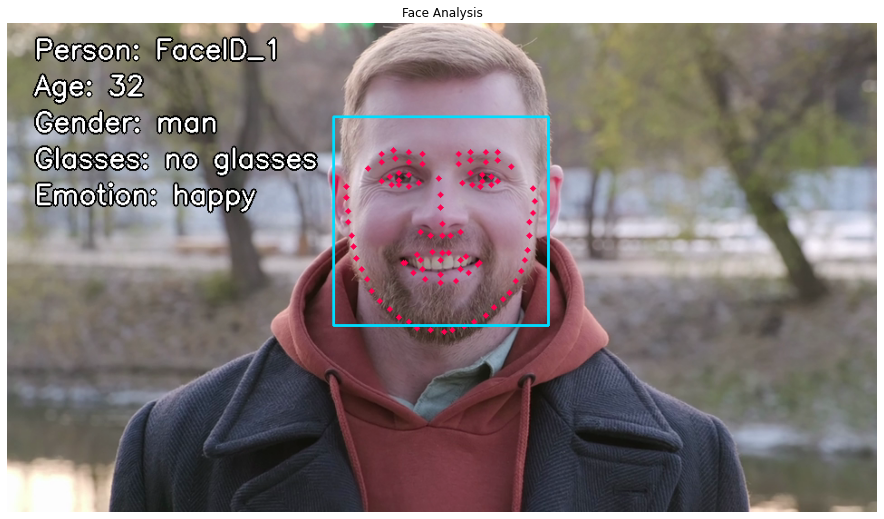

In [5]:
vid = cv2.VideoCapture("video.mp4")
plt.rcParams["figure.figsize"] = (16, 9)

try:
    while(True):
        ret, frame = vid.read()
        if not ret:
            vid.release()
            break
        faces = faceDetection.run(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        for i, (left, top, right, bottom) in enumerate(faces):
            face = frame[int(top):int(bottom), int(left):int(right)]
            person = faceRecognition.run(face)
            age = ageDetection.run(face)
            gender = genderDetection.run(face)
            glasses = glassesDetection.run(face)
            emotion = emotionDetection.run(face)
            landmarks = faceLandmark.run(face)
            for i in range(0, 196, 2):
                x = int(landmarks[i] * (face.shape[1] / 80) + left)
                y = int(landmarks[i + 1] * (face.shape[0] / 80) + top)
                cv2.circle(
                        img=frame,
                        center=(x, y),
                        radius=1,
                        color=(255, 0, 80),
                        thickness=4,
                    )


            cv2.rectangle(frame, (int(left), int(top)), (int(right), int(bottom)), (0, 221, 255), 2)    
            cv2.putText(frame, "Person: {person}".format(person = person),
                        (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
            cv2.putText(frame, "Person: {person}".format(person = person),
                        (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            
            cv2.putText(frame, "Age: {age}".format(age = age),
                        (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
            cv2.putText(frame, "Age: {age}".format(age = age),
                        (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            
            cv2.putText(frame, "Gender: {gender}".format(gender = gender),
                        (30, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
            cv2.putText(frame, "Gender: {gender}".format(gender = gender),
                        (30, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            
            cv2.putText(frame, "Glasses: {glasses}".format(glasses = glasses),
                        (30, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
            cv2.putText(frame, "Glasses: {glasses}".format(glasses = glasses),
                        (30, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            
            cv2.putText(frame, "Emotion: {emotion}".format(emotion = emotion),
                        (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)
            cv2.putText(frame, "Emotion: {emotion}".format(emotion = emotion),
                        (30, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            
        plt.axis('off')
        plt.title("Face Analysis")
        plt.imshow(frame)
        plt.show()
        clear_output(wait=True)
        
except KeyboardInterrupt:
    vid.release()

In [6]:
from humanSegmentation import HumanSegmentation

In [7]:
# Init network - Human Segmentation
humanSegmentation = HumanSegmentation()

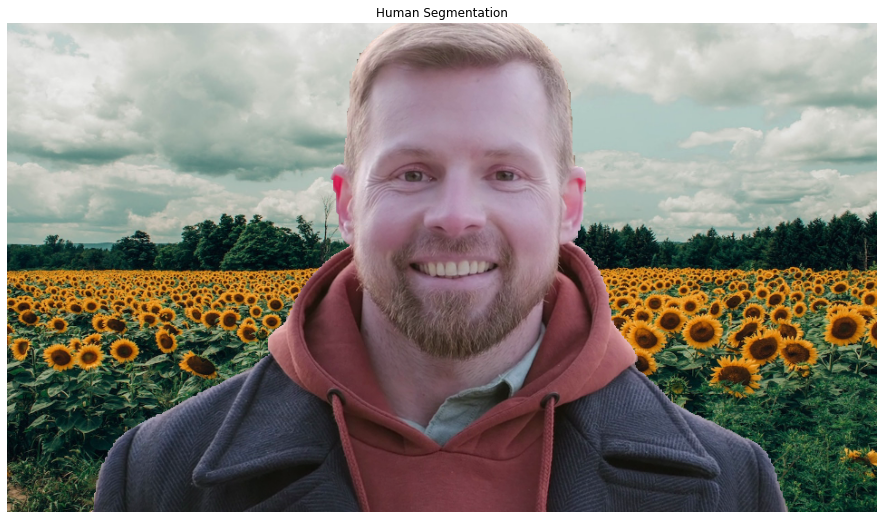

In [8]:
vid = cv2.VideoCapture("video.mp4")
plt.rcParams["figure.figsize"] = (16, 9)

try:
    while(True):
        ret, frame = vid.read()
        if not ret:
            vid.release()
            break
        segmentation = humanSegmentation.run(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        segmentation = cv2.resize(segmentation, (frame.shape[1], frame.shape[0]))
        bg = cv2.imread("bg.jpg")
        bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
        bg = cv2.resize(bg, (frame.shape[1], frame.shape[0]))
        bg[segmentation >= 0.7] = frame[segmentation >= 0.7]
        
        plt.axis('off')
        plt.title("Human Segmentation")
        plt.imshow(bg)
        plt.show()
        clear_output(wait=True)
        
except KeyboardInterrupt:
    vid.release()